In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Scipy: a package for loading data with (.mat) format
3.   Mpl_toolkits: for 3D-plot visualization
4.   Matplotlib: a package for data visualization
5.   Skearn: a package including many machine learning approaches

In [ ]:
import numpy as np #helps for array operation
import matplotlib.pyplot as plt #helps with graphical plots
import pandas as pd #helps to read the data
from sklearn.model_selection import train_test_split #helps to split training data and testing data
from sklearn.preprocessing import LabelEncoder #helps to encode bool/text variables to be numerical values
from sklearn.neighbors import KNeighborsClassifier as KNN #helps for classification
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding 
from sklearn.metrics import accuracy_score #helps to evaluate the prediction accuracy

# Load data using Pandas package

1.   Data structure visualization 
2.   Viariable transformation 
3.   Training data and testing data split 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/lab_code/diabetes_data.csv')  #Load data with the corresponding path in google drive 

In [ ]:
print (data.shape)

(520, 17)


In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
data_le = np.zeros_like(data)                    # Set up a matrix for encoded data 
data_le[:,0] = data.iloc[:,0]                    # The first coloum requires no encoding
for i in range(1, data.shape[1]):                # Encode the data using label encoder
   le = LabelEncoder().fit(data.iloc[:,i])
   data_le[:,i] = le.transform(data.iloc[:,i])

In [ ]:
print (data_le)

[[40 1 0 ... 1 1 1]
 [58 1 0 ... 1 0 1]
 [41 1 1 ... 1 0 1]
 ...
 [58 0 1 ... 0 1 1]
 [32 0 0 ... 1 0 0]
 [42 1 0 ... 0 0 0]]


In [ ]:
input = data_le[:,:-1]     # Features 
labels = data_le[:,-1:]    # labels

print ('Shape of features:', input.shape)
print ('Shape of labels:', labels.shape)

Shape of features: (520, 16)
Shape of labels: (520, 1)


In [ ]:
onehot = OneHotEncoder()                               #An objective for one-hot package
labels_onehot = onehot.fit_transform(labels).toarray() #Transform labels to be the one-hot format. For example, a sample belongs to the first class(denoted by 0), then its label will be transformed to be [1, 0] for a two-way classification.
print (labels_onehot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, labels_onehot, test_size=0.3, random_state=42) # Randomly split training data and test data with a ratio of 7:3

# Model training

In [ ]:
classifier = KNN(n_neighbors=3, p = 2).fit(X_train, y_train)         # Model fitting using the KNN classifier
print ('training accuracy:', classifier.score(X_train, y_train))

training accuracy: 0.9258241758241759


# Model testing and evaluation

In [ ]:
prediction = classifier.predict(X_test)                       # Predict the testing set
print (accuracy_score(prediction, y_test))                    # Evaluate the accuracy in the testing set

0.8717948717948718


# Discussion
1. How different n_neighbors affect the test accuracy?
2. How different distance functions i.e.,p affect the test accuracy

In [ ]:
acc1 = []
acc2 = []
neighbors = np.arange(1,20)
for neighbor in neighbors:
  classifier1 = KNN(n_neighbors = neighbor, p = 1).fit(X_train, y_train)    # Model fitting with different n_neighbors and the manhattan distance
  classifier2 = KNN(n_neighbors = neighbor, p = 2).fit(X_train, y_train)    # Model fitting with different n_neighbors and the euclidean distance  
  prediction1 = classifier1.predict(X_test)                                  # Predict the testing set
  prediction2 = classifier2.predict(X_test)                                  # Predict the testing set
  acc1.append(accuracy_score(prediction1, y_test))                           # Evaluate the accuracy in the testing set
  acc2.append(accuracy_score(prediction2, y_test))                           # Evaluate the accuracy in the testing set 

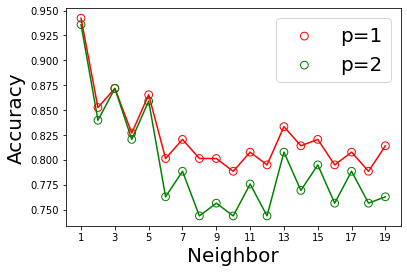

In [ ]:
# Visualization
plt.scatter(neighbors, acc1, c = 'None', edgecolor="r", s=60, label='p=1')
plt.plot(neighbors, acc1, c = 'r')
plt.scatter(neighbors, acc2, c = 'None', edgecolor="g", s=60, label='p=2')
plt.plot(neighbors, acc2, c = 'g')
plt.xlabel('Neighbor', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(np.arange(1,20,2))
plt.legend(fontsize=20)
plt.show()